<a id= "perplexity"> </a>
## 2: The role of perplexity in t-SNE 
<a href ="#contents">
<p style="text-align: right;">return to contents</p>
</a>

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

## Data and labels 
In this example we know the labels, hence we can test the performances of t-SNE and DBSCAN

In [14]:
#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


## t-SNE visualization, for true labels

/home/ubuntu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ubuntu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. Th

[[-567.2107   802.13135]
 [ 864.6307   103.34977]
 [-618.5626  -461.13437]
 ...
 [ 165.73145  176.26535]
 [  81.2007  -745.6324 ]
 [-155.23047  410.30554]]
Rand init run times/s:  [1.9013254642486572, 1.9088492393493652, 1.9561784267425537, 2.3391594886779785, 2.793748140335083]
PCA init run times/s:  [1.9205858707427979, 1.9897077083587646, 2.084808826446533, 2.4531431198120117, 2.91925311088562]


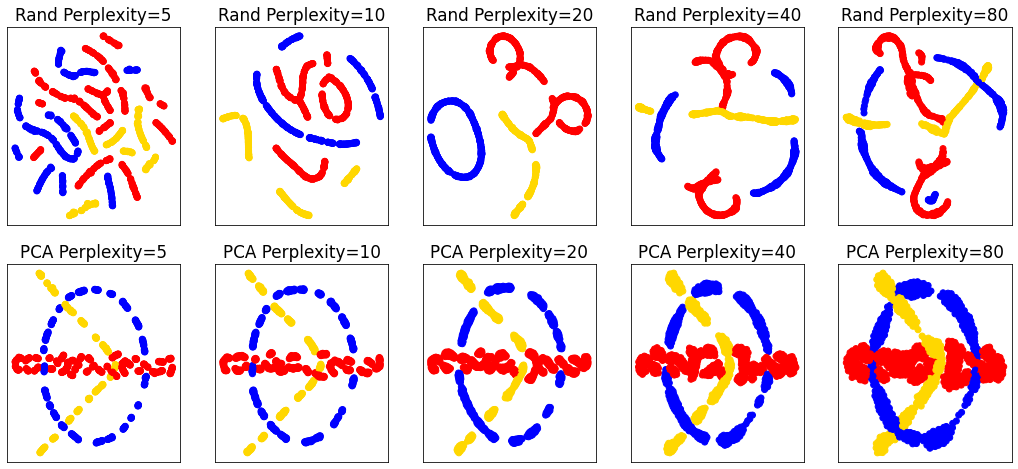

In [32]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80] #
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(2,Np , figsize=(18, 8))

X_all = [None]
rand_times = []
pca_times = []

def test_labeling(y, y_true):
    correct = 0
    false =0
    for a in range(0, len(y)):
        if y[a] == y_true[a]:
            correct+=1
        else:
            false +=1
    return correct, false

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, learning_rate=200)
    Y = tsne.fit_transform(data)
    #print(test_labeling(Y,y))
    
    t1 = time()
    ax.set_title("Rand Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    rand_times.append(t1-t0)

    ax = subplots[1][i]
    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity, learning_rate=200)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("PCA Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    pca_times.append(t1-t0)

print(Y)
print('Rand init run times/s: ', rand_times)
print('PCA init run times/s: ', pca_times)
plt.show()

The perplexity is related to the number of nearest neighbours that are used in the t_SNE algorithm. When the random initialiser   The plots above indicate that the perplexity is highly linked to the balance between global and local groupings. In the low perplexity graphs of perplexity 5 and 10, there are a lot of small groupings and the plot that closest resembles the input labelled data is the large perplexity of 80. 

In the case in which the t-SNE is initialised through PCA, the overall trend is that the graphs remain relatively consistent in shape. It appears that the PCA initialisation helped the t-SNE algorithm find the quickly find an optimal mapping. The same localisation towards globalisation trend at perplexity increases is noticeable but had less of an impact on the overall shape of the plot.  

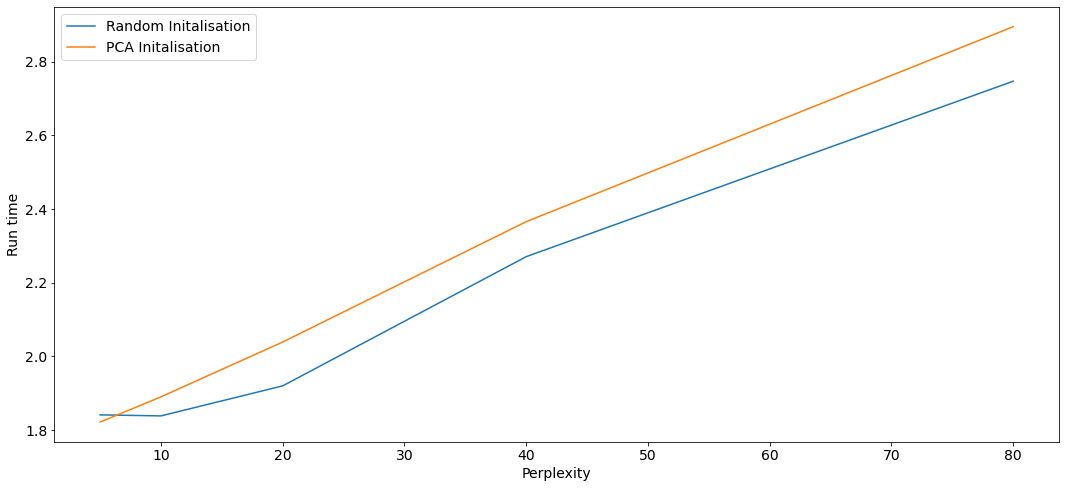

In [27]:
fig, ax =plt.subplots(1,1,figsize=(18,8))

ax.plot(perplexities, rand_times, label = "Random Initalisation")
ax.plot(perplexities, pca_times, label = "PCA Initalisation")

ax.set_xlabel("Perplexity")
ax.set_ylabel("Run time/s")
ax.legend()

PCA had a longer runtime than random initialisation over the various perplexities, however, it is recommended that this is explored further through different data sizes before meaningful conclusions can be drawn.  